## Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## KMeans clustering

### Using Age and Spending score

In [7]:
X = data[['Age','Spending Score (1-100)']].values

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, random_state = 27)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [9]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


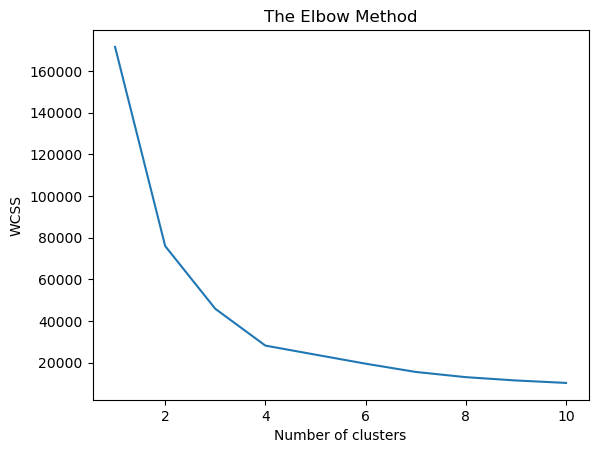

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, random_state = 27)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=27)

Text(0, 0.5, 'Spending Score')

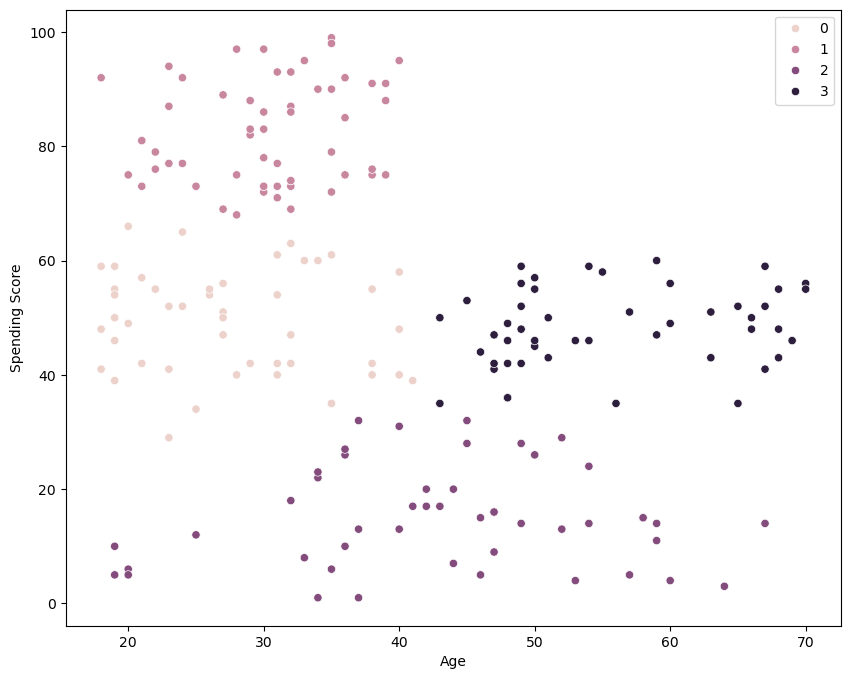

In [12]:
plt.figure(1, figsize= (10,8))
sns.scatterplot(x = X[:,0], y=X[:,1], hue = kmeans.labels_)
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Using Income and Spending Score

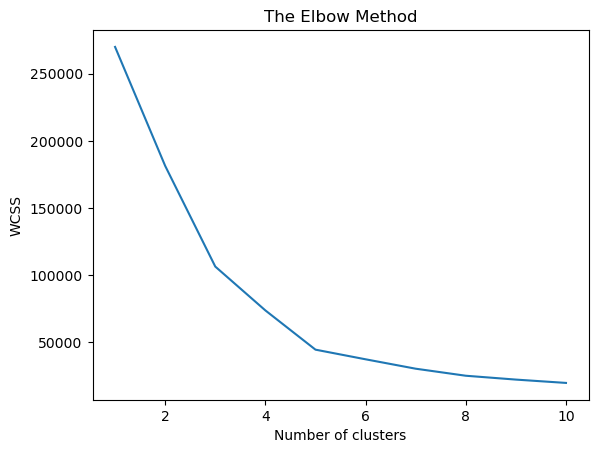

In [14]:
X = data[['Annual Income (k$)','Spending Score (1-100)']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, random_state = 27)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, random_state = 27)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=27)

Text(0, 0.5, 'Spending Score')

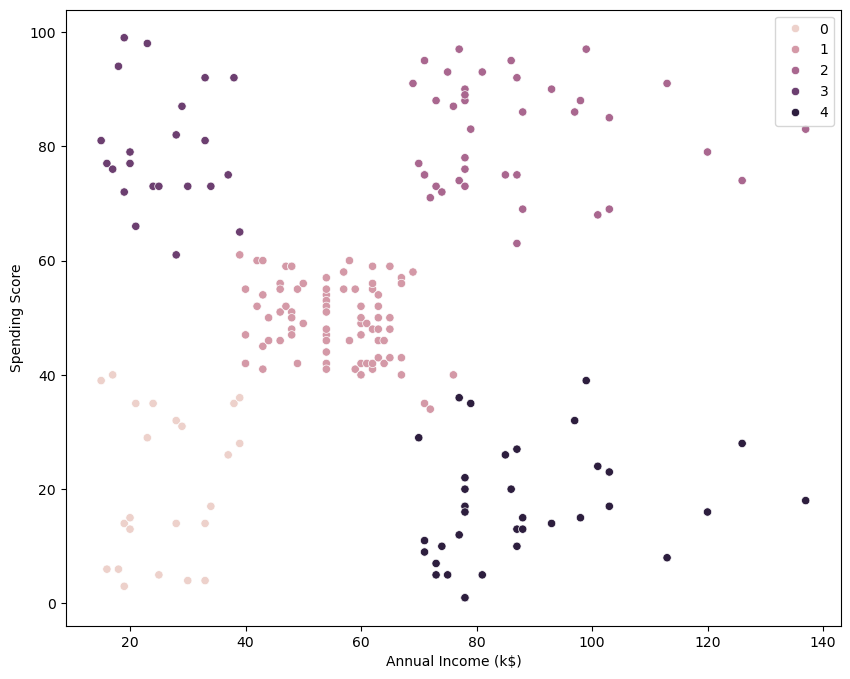

In [16]:
plt.figure(1, figsize= (10,8))
sns.scatterplot(x = X[:,0], y=X[:,1], hue = kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

### Using Age, Income and Spending Score

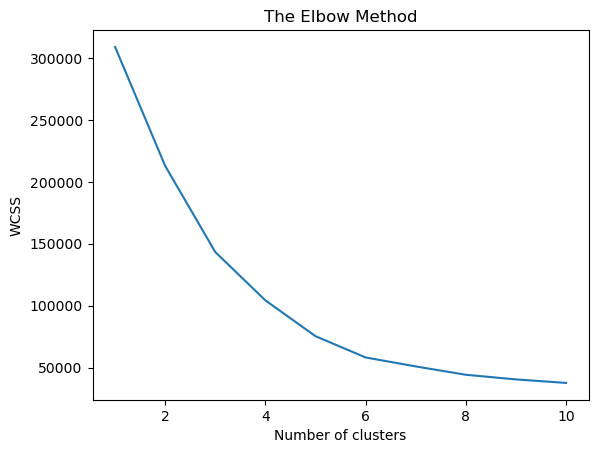

In [17]:
X = data[['Age','Annual Income (k$)','Spending Score (1-100)']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, random_state = 27)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Using Gender, Age, Income and Spending Score

In [19]:
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

In [20]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


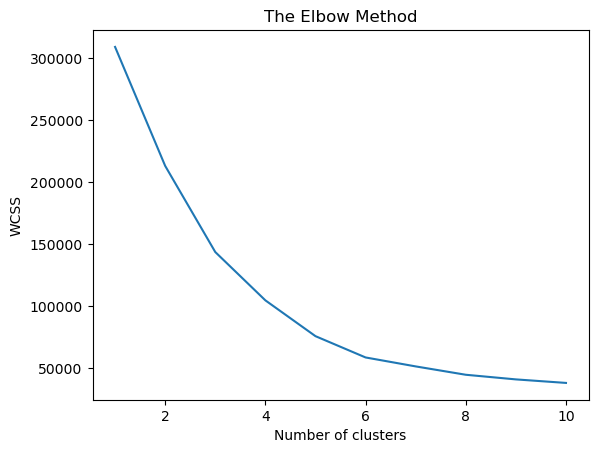

In [21]:
X = data[['Genre', 'Age','Annual Income (k$)','Spending Score (1-100)']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, random_state = 27)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, random_state = 27)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=27)

In [23]:
data['cluster'] = kmeans.labels_

In [24]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


<Axes: xlabel='count', ylabel='cluster'>

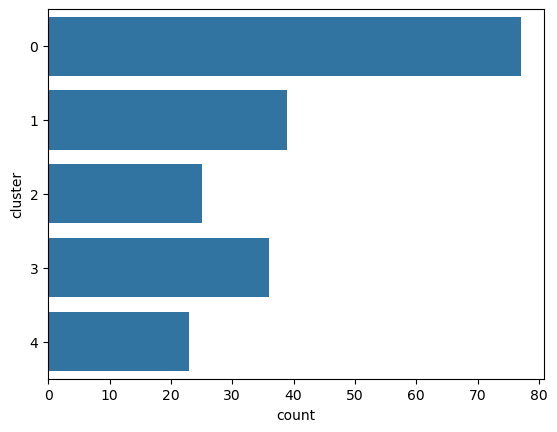

In [25]:
sns.countplot(y='cluster', data=data)

In [26]:
kmeans.cluster_centers_

array([[ 0.4025974 , 43.72727273, 55.48051948, 49.32467532],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.44      , 24.96      , 28.04      , 77.        ],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])